In [49]:
import os
#import ipdb

import pandas as pd
import matplotlib as mpl
from matplotlib import lines
from matplotlib import pyplot as plt
import matplotlib.dates as mdates
from statistics import mean 


#EXP_NAME = "tolerance/15"
headers = ['time', 'gateway']

#Read input files from the directory and returns DataTable object in a combined list
def read_gateway_change(dir_name):
    #Get list of nodes(files) with results
    INPUT_DIR = os.path.join(os.getcwd(), dir_name)
    data = pd.DataFrame()
    dirs = [f for f in os.listdir(INPUT_DIR) if os.path.isdir(os.path.join(INPUT_DIR))]    
    sum_change = 0
    for client in dirs:
        gw_data = pd.read_csv(os.path.join(INPUT_DIR, client), sep=',')
        gw_data.columns= headers
        gw_data = gw_data.set_index(pd.DatetimeIndex(gw_data['time']))
        gw_data = gw_data.head(100)
        last_gw = ""
        cnt = 0
        for index, row in gw_data.iterrows():
            if last_gw != row['gateway']:
                last_gw = row['gateway']
                cnt+=1
        sum_change +=cnt
    return sum_change/len(dirs)


# Static gateway changes reading

In [61]:
INPUT_DIR = os.path.join("wired/greedy/")
dirs = [f for f in os.listdir(INPUT_DIR) if os.path.isdir(os.path.join(INPUT_DIR))]

numbers = []
for path in dirs:
    numbers.append(read_gateway_change(os.path.join(INPUT_DIR, path+"/gwChange")))
    
wiredGreedy=  mean(numbers)

#INPUT_DIR = os.path.join("wired/random/")
#dirs = [f for f in os.listdir(INPUT_DIR) if os.path.isdir(os.path.join(INPUT_DIR))]

#numbers = []
#for path in dirs:
#    numbers.append(read_gateway_change(os.path.join(INPUT_DIR, path+"/gwChange")))
    
#wiredRandom=  mean(numbers)
wiredRandom = 0

INPUT_DIR = os.path.join("wired/power2/")
dirs = [f for f in os.listdir(INPUT_DIR) if os.path.isdir(os.path.join(INPUT_DIR))]
numbers = []
for path in dirs:
    numbers.append(read_gateway_change(os.path.join(INPUT_DIR, path+"/gwChange")))
    
wiredPower2 = mean(numbers)

INPUT_DIR = os.path.join("wired/static/")
dirs = [f for f in os.listdir(INPUT_DIR) if os.path.isdir(os.path.join(INPUT_DIR))]
numbers = []
for path in dirs:
    numbers.append(read_gateway_change(os.path.join(INPUT_DIR, path+"/gwChange")))
wiredStatic = mean(numbers)

# Wireless static gateway changes reading

In [53]:
INPUT_DIR = os.path.join("brute/wireless/")
dirs = [f for f in os.listdir(INPUT_DIR) if os.path.isdir(os.path.join(INPUT_DIR))]

numbers = []
for path in dirs:
    numbers.append(read_gateway_change(os.path.join(INPUT_DIR, path+"/gwChange")))
    
wirelessGreedy=  mean(numbers)

INPUT_DIR = os.path.join("power2/wireless/")
dirs = [f for f in os.listdir(INPUT_DIR) if os.path.isdir(os.path.join(INPUT_DIR))]
numbers = []
for path in dirs:
    numbers.append(read_gateway_change(os.path.join(INPUT_DIR, path+"/gwChange")))
    
wirelessPower2 = mean(numbers)

INPUT_DIR = os.path.join("complete_random/wireless/")
dirs = [f for f in os.listdir(INPUT_DIR) if os.path.isdir(os.path.join(INPUT_DIR))]
numbers = []
for path in dirs:
    numbers.append(read_gateway_change(os.path.join(INPUT_DIR, path+"/gwChange")))
wirelessRandom = mean(numbers)

INPUT_DIR = os.path.join("select_once/wireless/")
dirs = [f for f in os.listdir(INPUT_DIR) if os.path.isdir(os.path.join(INPUT_DIR))]
numbers = []
for path in dirs:
    numbers.append(read_gateway_change(os.path.join(INPUT_DIR, path+"/gwChange")))
wirelessSelectOnce = mean(numbers)

# Mobility gateway changes reading

In [54]:
INPUT_DIR = os.path.join("brute/mobility/")
dirs = [f for f in os.listdir(INPUT_DIR) if os.path.isdir(os.path.join(INPUT_DIR))]

numbers = []
for path in dirs:
    numbers.append(read_gateway_change(os.path.join(INPUT_DIR, path+"/gwChange")))
    
mobilityGreedy=  mean(numbers)

INPUT_DIR = os.path.join("power2/mobility/")
dirs = [f for f in os.listdir(INPUT_DIR) if os.path.isdir(os.path.join(INPUT_DIR))]
numbers = []
for path in dirs:
    numbers.append(read_gateway_change(os.path.join(INPUT_DIR, path+"/gwChange")))
    
mobilityPower2 = mean(numbers)

INPUT_DIR = os.path.join("complete_random/mobility/")
dirs = [f for f in os.listdir(INPUT_DIR) if os.path.isdir(os.path.join(INPUT_DIR))]
numbers = []
for path in dirs:
    numbers.append(read_gateway_change(os.path.join(INPUT_DIR, path+"/gwChange")))
mobilityRandom = mean(numbers)



INPUT_DIR = os.path.join("select_once/mobility/")
dirs = [f for f in os.listdir(INPUT_DIR) if os.path.isdir(os.path.join(INPUT_DIR))]
numbers = []
for path in dirs:
    numbers.append(read_gateway_change(os.path.join(INPUT_DIR, path+"/gwChange")))
mobilitySelectOnce = mean(numbers)

# Plots for the number of gateway changes for 100 rounds of measurement round

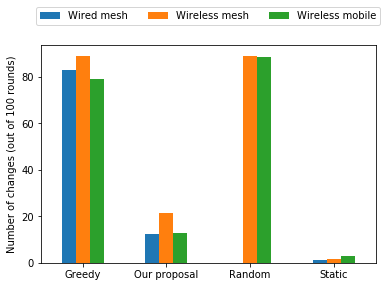

In [59]:

df = pd.DataFrame({
    'Wired mesh':{'Greedy':wiredGreedy, 
                          'Random':wiredRandom, 
                          'Our proposal':wiredPower2,
                         'Static': wiredStatic},
    
    'Wireless mesh':{'Greedy':wirelessGreedy,
                        'Random':wirelessRandom,
                        'Our proposal':wirelessPower2,
                        'Static':wirelessSelectOnce},
    
    'Wireless mobile':{'Greedy':mobilityGreedy, 
                               'Random':mobilityRandom, 
                               'Our proposal':mobilityPower2, 
                               'Static':mobilitySelectOnce}
})

ax = df.plot.bar(rot=360)
x_offset = -0.03
y_offset = 0.08
#for p in ax.patches:
#    b = p.get_bbox()
#    val = "{:+.2f}".format(b.y1 + b.y0)        
#    ax.annotate(val, ((b.x0 + b.x1)/2 + x_offset, b.y1 + y_offset))
plt.ylabel("Number of changes (out of 100 rounds)")
plt.legend(loc='upper center', ncol=3, bbox_to_anchor=(0.5, 1.2))
plt.show()

In [69]:
import warnings
warnings.filterwarnings('ignore')

headers = ['time', 'gateway']
def read_clients_per_gateway(dir_name):
    #Get list of nodes(files) with results
    INPUT_DIR = os.path.join(os.getcwd(), dir_name)
    data = pd.DataFrame()
    dirs = [f for f in os.listdir(INPUT_DIR) if os.path.isdir(os.path.join(INPUT_DIR))]    
    
    sum_change = 0
    for client in dirs:
        gw_data = pd.read_csv(os.path.join(INPUT_DIR, client), sep=',')
        gw_data.columns= headers
        gw_data = gw_data.set_index(pd.DatetimeIndex(gw_data['time']))
        gw_data = gw_data.head(100)
        data = data.append(gw_data)
        
    data = data.sort_index()
    groupDf = pd.DataFrame(columns=["time","gateway","users"])
    return data.groupby([pd.TimeGrouper(freq='2Min'), data['gateway']]).count().unstack().mean()

INPUT_DIR = os.path.join("wired/greedy/")
dirs = [f for f in os.listdir(INPUT_DIR) if os.path.isdir(os.path.join(INPUT_DIR))]
numbers = pd.Series()
for path in dirs:
    temp = read_clients_per_gateway(os.path.join(INPUT_DIR, path+"/gwChange"))
    numbers= numbers.append(temp)


wiredGreedy = numbers.groupby(numbers.index).mean()

columns = ['gw1', 'gw2', 'gw3', 'gw4', 'gw5', 'gw6', 'gw7', 'gw8', 'gw9', 'gw10']

wiredGreedy = wiredGreedy.reset_index()
wiredGreedy['gateway'] = columns
wiredGreedy = wiredGreedy.set_index(wiredGreedy['gateway'])



INPUT_DIR = os.path.join("wired/power2/")
dirs = [f for f in os.listdir(INPUT_DIR) if os.path.isdir(os.path.join(INPUT_DIR))]
numbers = pd.Series()
for path in dirs:
    temp = read_clients_per_gateway(os.path.join(INPUT_DIR, path+"/gwChange"))
    numbers= numbers.append(temp)
wiredPower2 = numbers.groupby(numbers.index).mean()
columns = ['gw1', 'gw2', 'gw3', 'gw4', 'gw5', 'gw6', 'gw7', 'gw8', 'gw9', 'gw10']

wiredPower2 = wiredPower2.reset_index()
wiredPower2['gateway'] = columns
wiredPower2 = wiredPower2.set_index(wiredPower2['gateway'])

INPUT_DIR = os.path.join("wired/random/")
dirs = [f for f in os.listdir(INPUT_DIR) if os.path.isdir(os.path.join(INPUT_DIR))]
numbers = pd.Series()
for path in dirs:
    temp = read_clients_per_gateway(os.path.join(INPUT_DIR, path+"/gwChange"))
    numbers= numbers.append(temp)
wiredRandom = numbers.groupby(numbers.index).mean()
columns = ['gw1', 'gw2', 'gw3', 'gw4', 'gw5', 'gw6', 'gw7', 'gw8', 'gw9', 'gw10']
wiredRandom = wiredRandom.reset_index()
wiredRandom['gateway'] = columns
wiredRandom = wiredRandom.set_index(wiredRandom['gateway'])



INPUT_DIR = os.path.join("wireless_with_host/greedy/")
dirs = [f for f in os.listdir(INPUT_DIR) if os.path.isdir(os.path.join(INPUT_DIR))]
numbers = pd.Series()
for path in dirs:
    temp = read_clients_per_gateway(os.path.join(INPUT_DIR, path+"/gwChange"))
    numbers= numbers.append(temp)

wirelessGreedy = numbers.groupby(numbers.index).mean()
columns = ['gw1', 'gw2', 'gw3', 'gw4', 'gw5', 'gw6', 'gw7', 'gw8', 'gw9', 'gw10']
wirelessGreedy = wirelessGreedy.reset_index()
wirelessGreedy['gateway'] = columns
wirelessGreedy = wirelessGreedy.set_index(wirelessGreedy['gateway'])

INPUT_DIR = os.path.join("wireless_with_host/power2/")
dirs = [f for f in os.listdir(INPUT_DIR) if os.path.isdir(os.path.join(INPUT_DIR))]
numbers = pd.Series()
for path in dirs:
    temp = read_clients_per_gateway(os.path.join(INPUT_DIR, path+"/gwChange"))
    numbers= numbers.append(temp)
wirelessPower2 = numbers.groupby(numbers.index).mean()
columns = ['gw1', 'gw2', 'gw3', 'gw4', 'gw5', 'gw6', 'gw7', 'gw8', 'gw9', 'gw10']
wirelessPower2 = wirelessPower2.reset_index()
wirelessPower2['gateway'] = columns
wirelessPower2 = wirelessPower2.set_index(wirelessPower2['gateway'])


INPUT_DIR = os.path.join("complete_random/wireless/")
dirs = [f for f in os.listdir(INPUT_DIR) if os.path.isdir(os.path.join(INPUT_DIR))]
numbers = pd.Series()
for path in dirs:
    temp = read_clients_per_gateway(os.path.join(INPUT_DIR, path+"/gwChange"))
    numbers= numbers.append(temp)
wirelessRandom = numbers.groupby(numbers.index).mean()
columns = ['gw1', 'gw2', 'gw3', 'gw4', 'gw5', 'gw6', 'gw7', 'gw8', 'gw9', 'gw10']
wirelessRandom = wirelessRandom.reset_index()
wirelessRandom['gateway'] = columns
wirelessRandom = wirelessRandom.set_index(wirelessRandom['gateway'])


INPUT_DIR = os.path.join("mobility_with_host/greedy/")
dirs = [f for f in os.listdir(INPUT_DIR) if os.path.isdir(os.path.join(INPUT_DIR))]
numbers = pd.Series()
for path in dirs:
    temp = read_clients_per_gateway(os.path.join(INPUT_DIR, path+"/gwChange"))
    numbers= numbers.append(temp)

mobilityGreedy = numbers.groupby(numbers.index).mean()
columns = ['gw1', 'gw2', 'gw3', 'gw4', 'gw5', 'gw6', 'gw7', 'gw8', 'gw9', 'gw10']
mobilityGreedy = mobilityGreedy.reset_index()
mobilityGreedy['gateway'] = columns
mobilityGreedy = mobilityGreedy.set_index(mobilityGreedy['gateway'])

INPUT_DIR = os.path.join("mobility_with_host/power2/")
dirs = [f for f in os.listdir(INPUT_DIR) if os.path.isdir(os.path.join(INPUT_DIR))]
numbers = pd.Series()
for path in dirs:
    temp = read_clients_per_gateway(os.path.join(INPUT_DIR, path+"/gwChange"))
    numbers= numbers.append(temp)
mobilityPower2 = numbers.groupby(numbers.index).mean()
columns = ['gw1', 'gw2', 'gw3', 'gw4', 'gw5', 'gw6', 'gw7', 'gw8', 'gw9', 'gw10']
mobilityPower2 = mobilityPower2.reset_index()
mobilityPower2['gateway'] = columns
mobilityPower2 = mobilityPower2.set_index(mobilityPower2['gateway'])

INPUT_DIR = os.path.join("mobility_with_host/random/")
dirs = [f for f in os.listdir(INPUT_DIR) if os.path.isdir(os.path.join(INPUT_DIR))]
numbers = pd.Series()
for path in dirs:
    temp = read_clients_per_gateway(os.path.join(INPUT_DIR, path+"/gwChange"))
    numbers= numbers.append(temp)
mobilityRandom = numbers.groupby(numbers.index).mean()
columns = ['gw1', 'gw2', 'gw3', 'gw4', 'gw5', 'gw6', 'gw7', 'gw8', 'gw9', 'gw10']
mobilityRandom = mobilityRandom.reset_index()
mobilityRandom['gateway'] = columns
mobilityRandom = mobilityRandom.set_index(mobilityRandom['gateway'])


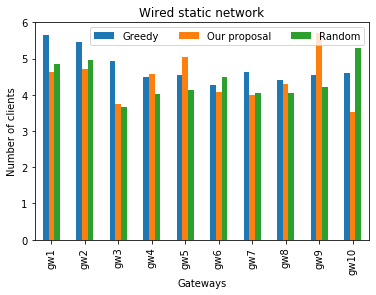

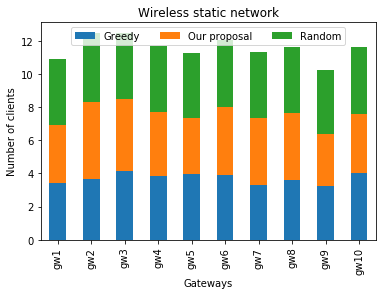

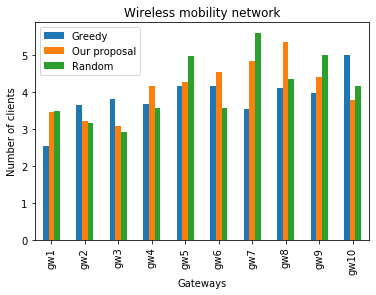

In [9]:
df = pd.DataFrame({'Greedy': wiredGreedy[0],
                   'Our proposal':wiredPower2[0],
                   'Random':wiredRandom[0]})
df.plot.bar()
plt.legend(ncol=3)
plt.title('Wired static network')
plt.xlabel('Gateways')
plt.ylabel('Number of clients')
plt.show()

df = pd.DataFrame({'Greedy':wirelessGreedy[0], 
                               'Our proposal':wirelessPower2[0], 
                                   'Random':wirelessRandom[0]})
df.plot.bar(stacked=True)
plt.title('Wireless static network')
plt.legend(loc='upper center', ncol=3)

plt.xlabel('Gateways')
plt.ylabel('Number of clients')
plt.show()


df = pd.DataFrame({'Greedy':mobilityGreedy[0], 
                               'Our proposal':mobilityPower2[0], 
                                   'Random':mobilityRandom[0]})
df.plot.bar()
plt.title('Wireless mobility network')
plt.xlabel('Gateways')
plt.ylabel('Number of clients')
plt.show()

#df.plot.bar(rot=360)
#plt.ylabel("Number of changes (out of 100 rounds)")
#plt.show()

In [3]:
#EXP_NAME = "tolerance/15"
headers = ['time', 'gateway']

#Read input files from the directory and returns DataTable object in a combined list
def read_gateway_users(dir_name, title, fr):
    #Get list of nodes(files) with results
    INPUT_DIR = os.path.join(os.getcwd(), dir_name)
    data = pd.DataFrame()
    dirs = [f for f in os.listdir(INPUT_DIR) if os.path.isdir(os.path.join(INPUT_DIR))]    
    
    sum_change = 0
    for client in dirs:
        gw_data = pd.read_csv(os.path.join(INPUT_DIR, client), sep=',')
        gw_data.columns= headers
        gw_data = gw_data.set_index(pd.DatetimeIndex(gw_data['time']))
        gw_data = gw_data.head(50)
        data = data.append(gw_data)
    
    data = data.sort_index()
    groupDf = pd.DataFrame(columns=["time","gateway","users"])
    data.groupby([pd.TimeGrouper(freq=fr), data['gateway']]).count().unstack().iloc[20:25].plot.bar(rot=45)
    #for name, group in data.groupby([pd.TimeGrouper(freq='2min'), data['gateway']]):
    #    groupDf = groupDf.append({"time":name[0],"gateway":name[1], "users":len(group)}, ignore_index=True)
    
    #groupDf = groupDf.set_index(pd.DatetimeIndex(groupDf['time']))
    #groupDf = groupDf.sort_index()
    #print(groupDf.head(10))
    #groupDf[['gateway','users']].head(10).plot.bar(rot=45, y = ['user'], x='gateway')
    plt.legend(['g1','g2','g3','g4','g5','g6','g7','g8','g9','g10'],loc='center left', bbox_to_anchor=(1.0, 0.5))
    plt.title(title)
    plt.show()
    #for every gateway, find the avg load
    #for name, group in (groupDf.groupby(['gateway'])):
    #    print(name, group['users'])
        

        
read_gateway_users("wirelessMobility/greedy/gwChange", 'Wireless mobility greedy', '2Min')
read_gateway_users("wirelessMobility/power2/gwChange", 'Wireless mobility our proposal', '2Min')
read_gateway_users("wirelessMobility/random/gwChange", 'Wireless mobility random', '2Min')


read_gateway_users("wireless/40nodes/greedy/gwChange", 'Wireless greedy', '2Min')
read_gateway_users("wireless/40nodes/power2/gwChange", 'Wireless our proposal', '2Min')
read_gateway_users("wireless/40nodes/random/gwChange", 'Wireless random', '2Min')

read_gateway_users("wired/best/gwChange", 'Wired greedy', '2Min')
read_gateway_users("wired/power2/gwChange", 'Wired our proposal', '2Min')
read_gateway_users("wired/random/gwChange", 'Wired random', '2Min')

FileNotFoundError: [Errno 2] No such file or directory: '/home/khulan/mn/selectionLayer/wirelessMobility/greedy/gwChange'

In [25]:
#EXP_NAME = "tolerance/15"
headers = ['time', 'latency']

#Read input files from the directory and returns DataTable object in a combined list
def read_gateway_users(dir_name):
    #Get list of nodes(files) with results
    INPUT_DIR = os.path.join(os.getcwd(), dir_name)
    data = pd.DataFrame()
    dirs = [f for f in os.listdir(INPUT_DIR) if os.path.isdir(os.path.join(INPUT_DIR))]    
    
    sum_change = 0
    for client in dirs:
        gw_data = pd.read_csv(os.path.join(INPUT_DIR, client), sep=',')
        gw_data.columns= headers
        gw_data = gw_data.set_index(pd.DatetimeIndex(gw_data['time']))
        data = data.append(gw_data)
    
    data = data.sort_index()
    return data.groupby([pd.TimeGrouper(freq='1min')]).mean()

def getECDF(df, attr):
    """Helper function that caclulates the ECDF of a dataframe"""
    df = df[attr].value_counts()
    ecdf = df.sort_index().cumsum()*1./df.sum()    
    return ecdf

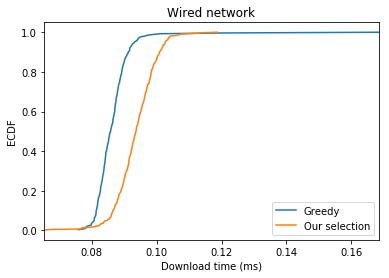

In [48]:
import warnings
warnings.filterwarnings('ignore')

headers = ['time', 'latency']

#INPUT_DIR = os.path.join("wired/greedy/")
#dirs = [f for f in os.listdir(INPUT_DIR) if os.path.isdir(os.path.join(INPUT_DIR))]

#numbers = pd.DataFrame()
#for path in dirs:
#    numbers = numbers.append(read_gateway_users(os.path.join(INPUT_DIR, path+"/download")))

fig, ax = plt.subplots()
#getECDF(numbers,'latency').plot()


INPUT_DIR = os.path.join("wired/power2/")
dirs = [f for f in os.listdir(INPUT_DIR) if os.path.isdir(os.path.join(INPUT_DIR))]

numbers = pd.DataFrame()
for path in dirs:
    numbers = numbers.append(read_gateway_users(os.path.join(INPUT_DIR, path+"/download")))
getECDF(numbers, 'latency').plot(ax=ax)


INPUT_DIR = os.path.join("wired/static/")
dirs = [f for f in os.listdir(INPUT_DIR) if os.path.isdir(os.path.join(INPUT_DIR))]

numbers = pd.DataFrame()
for path in dirs:
    numbers = numbers.append(read_gateway_users(os.path.join(INPUT_DIR, path+"/download")))
getECDF(numbers,'latency').plot(ax=ax)

plt.legend(['Greedy','Our selection', 'Static'])
plt.ylabel('ECDF')
plt.xlabel('Download time (ms)')
plt.title('Wired network')
#plt.xlim(0,1)
plt.show()
    


/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:19: FutureWarning: pd.TimeGrouper is deprecated and will be removed; Please use pd.Grouper(freq=...)


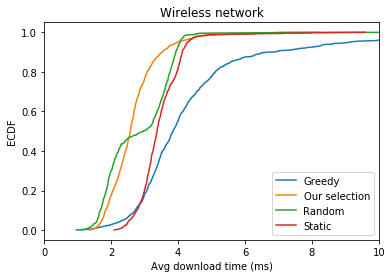

In [27]:
headers = ['time', 'latency']

INPUT_DIR = os.path.join("brute/wireless/")
dirs = [f for f in os.listdir(INPUT_DIR) if os.path.isdir(os.path.join(INPUT_DIR))]

numbers = pd.DataFrame()
for path in dirs:
    numbers = numbers.append(read_gateway_users(os.path.join(INPUT_DIR, path+"/download")))

fig, ax = plt.subplots()
getECDF(numbers,'latency').plot()


INPUT_DIR = os.path.join("power2/wireless")
dirs = [f for f in os.listdir(INPUT_DIR) if os.path.isdir(os.path.join(INPUT_DIR))]

numbers = pd.DataFrame()
for path in dirs:
    numbers = numbers.append(read_gateway_users(os.path.join(INPUT_DIR, path+"/download")))
getECDF(numbers, 'latency').plot(ax=ax)


INPUT_DIR = os.path.join("complete_random/wireless/")
dirs = [f for f in os.listdir(INPUT_DIR) if os.path.isdir(os.path.join(INPUT_DIR))]
numbers = pd.DataFrame()
for path in dirs:
    numbers = numbers.append(read_gateway_users(os.path.join(INPUT_DIR, path+"/download")))
getECDF(numbers, 'latency').plot(ax=ax)


INPUT_DIR = os.path.join("select_once/wireless/")
dirs = [f for f in os.listdir(INPUT_DIR) if os.path.isdir(os.path.join(INPUT_DIR))]
numbers = pd.DataFrame()
for path in dirs:
    numbers = numbers.append(read_gateway_users(os.path.join(INPUT_DIR, path+"/download")))
getECDF(numbers, 'latency').plot(ax=ax)


plt.legend(['Greedy','Our selection','Random', 'Static'])
plt.ylabel('ECDF')
plt.xlabel('Avg download time (ms)')
plt.title('Wireless network')
plt.xlim(0,10)
plt.show()
    

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:19: FutureWarning: pd.TimeGrouper is deprecated and will be removed; Please use pd.Grouper(freq=...)


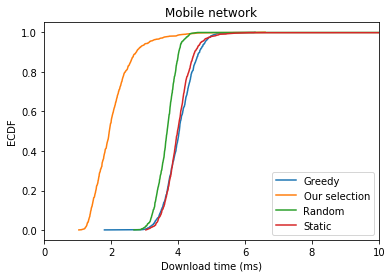

In [33]:
INPUT_DIR = os.path.join("brute/mobility/")
dirs = [f for f in os.listdir(INPUT_DIR) if os.path.isdir(os.path.join(INPUT_DIR))]

numbers = pd.DataFrame()
for path in dirs:
    numbers = numbers.append(read_gateway_users(os.path.join(INPUT_DIR, path+"/download")))

fig, ax = plt.subplots()
getECDF(numbers,'latency').plot()


INPUT_DIR = os.path.join("power2/mobility/")
dirs = [f for f in os.listdir(INPUT_DIR) if os.path.isdir(os.path.join(INPUT_DIR))]

numbers = pd.DataFrame()
for path in dirs:
    numbers = numbers.append(read_gateway_users(os.path.join(INPUT_DIR, path+"/download")))
getECDF(numbers,'latency').plot(ax=ax)


INPUT_DIR = os.path.join("complete_random/mobility/")
dirs = [f for f in os.listdir(INPUT_DIR) if os.path.isdir(os.path.join(INPUT_DIR))]

numbers = pd.DataFrame()
for path in dirs:
    numbers = numbers.append(read_gateway_users(os.path.join(INPUT_DIR, path+"/download")))
getECDF(numbers,'latency').plot(ax=ax)

INPUT_DIR = os.path.join("select_once/mobility/")
dirs = [f for f in os.listdir(INPUT_DIR) if os.path.isdir(os.path.join(INPUT_DIR))]
numbers = pd.DataFrame()
for path in dirs:
    numbers = numbers.append(read_gateway_users(os.path.join(INPUT_DIR, path+"/download")))
getECDF(numbers, 'latency').plot(ax=ax)

plt.legend(['Greedy','Our selection','Random','Static'])
plt.ylabel('ECDF')
plt.xlabel('Download time (ms)')
plt.title('Mobile network')
plt.xlim(0,10)
plt.show()    

# Finding the effect of density affects to the download time

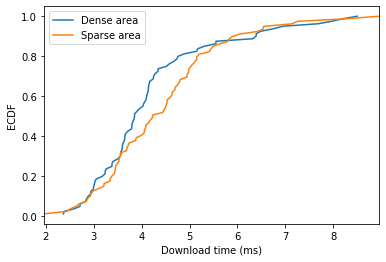

In [12]:
import os
#import ipdb

import pandas as pd
import matplotlib as mpl
from matplotlib import lines
from matplotlib import pyplot as plt
import matplotlib.dates as mdates
from statistics import mean 


INPUT_DIR = os.path.join("sparse/download/dense")
dirs = [f for f in os.listdir(INPUT_DIR) if os.path.isdir(os.path.join(INPUT_DIR))]
dense =  read_gateway_users(os.path.join(INPUT_DIR))
ax = getECDF(dense, 'latency').plot()



INPUT_DIR = os.path.join("sparse/download/sparse")
dirs = [f for f in os.listdir(INPUT_DIR) if os.path.isdir(os.path.join(INPUT_DIR))]
sparse =  read_gateway_users(os.path.join(INPUT_DIR))

getECDF(sparse,'latency').plot(ax=ax)
plt.legend(['Dense area','Sparse area'])
plt.ylabel('ECDF')
plt.xlabel('Download time (ms)')
plt.show()

In [42]:
#EXP_NAME = "tolerance/15"
headers = ['time', 'candidates']

#Read input files from the directory and returns DataTable object in a combined list
def read_gateway_candidates(dir_name):
    #Get list of nodes(files) with results
    INPUT_DIR = os.path.join(os.getcwd(), dir_name)
    data = pd.DataFrame()
    dirs = [f for f in os.listdir(INPUT_DIR) if os.path.isdir(os.path.join(INPUT_DIR))]    
    
    sum_change = 0
    for client in dirs:
        gw_data = pd.read_csv(os.path.join(INPUT_DIR, client), sep=',')
        gw_data.columns= headers
        gw_data = gw_data.set_index(pd.DatetimeIndex(gw_data['time']))
        data = data.append(gw_data)
    
    data = data.sort_index()
    return data.groupby([pd.TimeGrouper(freq='2min')]).mean()


# Number of available candidates sparse vs dense area

/home/khulan/.local/lib/python3.6/site-packages/ipykernel_launcher.py:19: FutureWarning: pd.TimeGrouper is deprecated and will be removed; Please use pd.Grouper(freq=...)
/home/khulan/.local/lib/python3.6/site-packages/ipykernel_launcher.py:19: FutureWarning: pd.TimeGrouper is deprecated and will be removed; Please use pd.Grouper(freq=...)


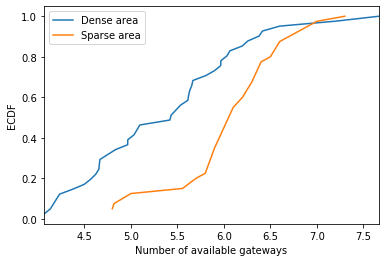

In [43]:

INPUT_DIR = os.path.join("sparse/candidates/dense")
dirs = [f for f in os.listdir(INPUT_DIR) if os.path.isdir(os.path.join(INPUT_DIR))]
dense =  read_gateway_candidates(os.path.join(INPUT_DIR))
ax = getECDF(dense, 'candidates').plot()



INPUT_DIR = os.path.join("sparse/candidates/sparse")
dirs = [f for f in os.listdir(INPUT_DIR) if os.path.isdir(os.path.join(INPUT_DIR))]
sparse =  read_gateway_candidates(os.path.join(INPUT_DIR))

getECDF(sparse, 'candidates').plot(ax=ax)

plt.legend(['Dense area','Sparse area'])
plt.ylabel('ECDF')
plt.xlabel('Number of available gateways')
plt.show()

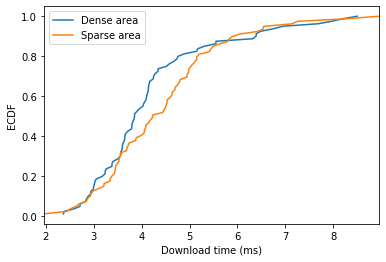

In [17]:
headers = ['time', 'latency']
ax = getECDF(read_gateway_users(os.path.join('sparse/download/dense')),'latency').plot()
getECDF(read_gateway_users(os.path.join("sparse/download/sparse")),'latency').plot(ax=ax)
plt.legend(['Dense area','Sparse area'])
plt.ylabel('ECDF')
plt.xlabel('Download time (ms)')
plt.show()

# Number of selection choices D=[1,2,3,4]

/home/khulan/.local/lib/python3.6/site-packages/ipykernel_launcher.py:18: FutureWarning: pd.TimeGrouper is deprecated and will be removed; Please use pd.Grouper(freq=...)
/home/khulan/.local/lib/python3.6/site-packages/ipykernel_launcher.py:18: FutureWarning: pd.TimeGrouper is deprecated and will be removed; Please use pd.Grouper(freq=...)
/home/khulan/.local/lib/python3.6/site-packages/ipykernel_launcher.py:18: FutureWarning: pd.TimeGrouper is deprecated and will be removed; Please use pd.Grouper(freq=...)
/home/khulan/.local/lib/python3.6/site-packages/ipykernel_launcher.py:18: FutureWarning: pd.TimeGrouper is deprecated and will be removed; Please use pd.Grouper(freq=...)


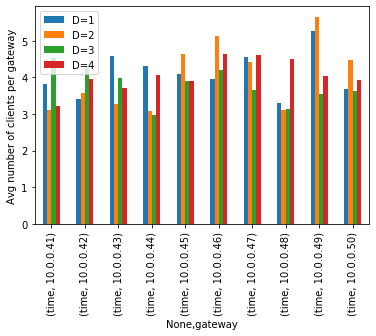

In [13]:
headers = ['time', 'gateway']
def read_clients_per_gateway(dir_name):
    #Get list of nodes(files) with results
    INPUT_DIR = os.path.join(os.getcwd(), dir_name)
    data = pd.DataFrame()
    dirs = [f for f in os.listdir(INPUT_DIR) if os.path.isdir(os.path.join(INPUT_DIR))]    
    
    sum_change = 0
    for client in dirs:
        gw_data = pd.read_csv(os.path.join(INPUT_DIR, client), sep=',')
        gw_data.columns= headers
        gw_data = gw_data.set_index(pd.DatetimeIndex(gw_data['time']))
        gw_data = gw_data.head(100)
        data = data.append(gw_data)
        
    data = data.sort_index()
    groupDf = pd.DataFrame(columns=["time","gateway","users"])
    return data.groupby([pd.TimeGrouper(freq='2Min'), data['gateway']]).count().unstack().mean()
    

df = pd.DataFrame({'D=1':read_clients_per_gateway('multiD/1/gwChange'),
                   'D=2':read_clients_per_gateway('multiD/2/gwChange'),
                  'D=3':read_clients_per_gateway('multiD/3/gwChange'),
                  'D=4':read_clients_per_gateway('multiD/4/gwChange')})


df.boxplot(by=df[0], rot=90)
plt.suptitle('')
plt.ylabel('Number of client nodes')
plt.title("Wireless - Static")
plt.show()

df.plot.bar(rot=90)
plt.ylabel('Avg number of clients per gateway')
plt.show()
        


/home/khulan/.local/lib/python3.6/site-packages/ipykernel_launcher.py:18: FutureWarning: pd.TimeGrouper is deprecated and will be removed; Please use pd.Grouper(freq=...)
/home/khulan/.local/lib/python3.6/site-packages/ipykernel_launcher.py:18: FutureWarning: pd.TimeGrouper is deprecated and will be removed; Please use pd.Grouper(freq=...)
/home/khulan/.local/lib/python3.6/site-packages/ipykernel_launcher.py:18: FutureWarning: pd.TimeGrouper is deprecated and will be removed; Please use pd.Grouper(freq=...)
/home/khulan/.local/lib/python3.6/site-packages/ipykernel_launcher.py:18: FutureWarning: pd.TimeGrouper is deprecated and will be removed; Please use pd.Grouper(freq=...)


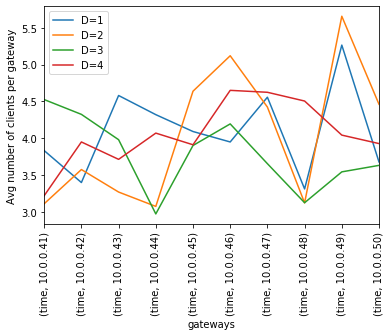

In [6]:
headers = ['time', 'gateway']
def read_clients_per_gateway(dir_name):
    #Get list of nodes(files) with results
    INPUT_DIR = os.path.join(os.getcwd(), dir_name)
    data = pd.DataFrame()
    dirs = [f for f in os.listdir(INPUT_DIR) if os.path.isdir(os.path.join(INPUT_DIR))]    
    
    sum_change = 0
    for client in dirs:
        gw_data = pd.read_csv(os.path.join(INPUT_DIR, client), sep=',')
        gw_data.columns= headers
        gw_data = gw_data.set_index(pd.DatetimeIndex(gw_data['time']))
        gw_data = gw_data.head(100)
        data = data.append(gw_data)
        
    data = data.sort_index()
    groupDf = pd.DataFrame(columns=["time","gateway","users"])
    data.groupby([pd.TimeGrouper(freq='2Min'), data['gateway']]).count().unstack().mean().plot(rot=90)
    



read_clients_per_gateway('multiD/1/gwChange')
read_clients_per_gateway('multiD/2/gwChange')
read_clients_per_gateway('multiD/3/gwChange')
read_clients_per_gateway('multiD/4/gwChange')
plt.legend(['D=1', 'D=2','D=3','D=4'])
plt.xlabel('gateways')
plt.ylabel('Avg number of clients per gateway')
plt.show()



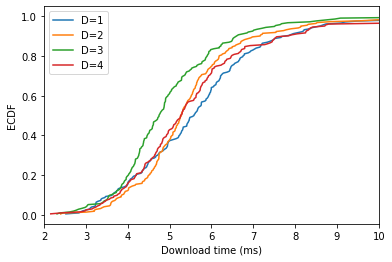

In [21]:
headers = ['time', 'latency']
fig, ax = plt.subplots()
ax = getECDF(read_gateway_users(os.path.join("multiD/1/download")),'latency').plot()

getECDF(read_gateway_users(os.path.join("multiD/2/download")),'latency').plot(ax=ax)
getECDF(read_gateway_users(os.path.join("multiD/3/download")),'latency').plot(ax=ax)
getECDF(read_gateway_users(os.path.join("multiD/4/download")),'latency').plot(ax=ax)

plt.legend(['D=1','D=2','D=3','D=4'])
plt.ylabel('ECDF')
plt.xlabel('Download time (ms)')
plt.xlim(2, 10)
plt.show()
    

# Performance varied gateway nodes experiment

Here 3 gateways are configured with bad latency
2 gateways are configured with varying latency
5 remaining gateways are configured with normal latency

The idea is to see if client nodes are avoiding from the bad gateways and focusing more on the good gateways

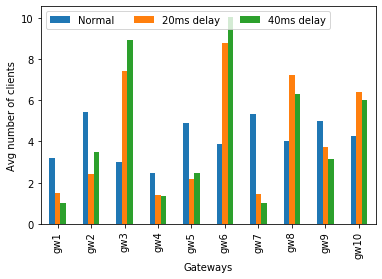

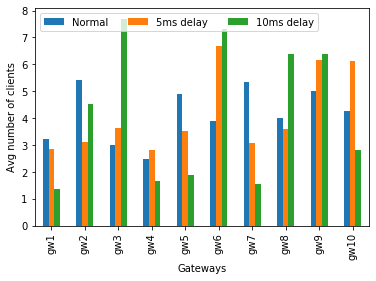

In [22]:
headers = ['time', 'gateway']

numbers = pd.Series()
temp = read_clients_per_gateway("cpuVariance/variance_5ms/gwChange")
numbers= numbers.append(temp)
var_5ms = numbers.groupby(numbers.index).mean().reset_index()
var_5ms['gateway'] = ['gw1', 'gw2', 'gw3', 'gw4', 'gw5', 'gw6', 'gw7', 'gw8', 'gw9', 'gw10']
var_5ms = var_5ms.set_index(var_5ms['gateway'])

numbers = pd.Series()
temp = read_clients_per_gateway("cpuVariance/variance_10ms/gwChange")
numbers= numbers.append(temp)
var_10ms = numbers.groupby(numbers.index).mean().reset_index()
var_10ms['gateway'] = ['gw1', 'gw2', 'gw3', 'gw4', 'gw5', 'gw6', 'gw7', 'gw8', 'gw9', 'gw10']
var_10ms = var_10ms.set_index(var_10ms['gateway'])

numbers = pd.Series()
temp = read_clients_per_gateway("cpuVariance/variance_20ms/gwChange")
numbers= numbers.append(temp)
var_20ms = numbers.groupby(numbers.index).mean().reset_index()
var_20ms['gateway'] = ['gw1', 'gw2', 'gw3', 'gw4', 'gw5', 'gw6', 'gw7', 'gw8', 'gw9', 'gw10']
var_20ms = var_20ms.set_index(var_20ms['gateway'])

numbers = pd.Series()
temp = read_clients_per_gateway("cpuVariance/variance_40ms/gwChange")
numbers= numbers.append(temp)
var_40ms = numbers.groupby(numbers.index).mean().reset_index()
var_40ms['gateway'] = ['gw1', 'gw2', 'gw3', 'gw4', 'gw5', 'gw6', 'gw7', 'gw8', 'gw9', 'gw10']
var_40ms =  var_40ms.set_index(var_40ms['gateway'])


numbers = pd.Series()
temp = read_clients_per_gateway("cpuVariance/normal/gwChange")
numbers= numbers.append(temp)



#var_normal = numbers.groupby(numbers.index)
#columns = ['gw1', 'gw2', 'gw3', 'gw4', 'gw5', 'gw6', 'gw7', 'gw8', 'gw9', 'gw10']

var_normal = var_normal.mean().reset_index()
var_normal['gateway'] = columns
var_normal = var_normal.set_index(var_normal['gateway'])


variance = pd.DataFrame({
    "Normal": var_normal[0],
    #"10ms delay": var_10ms[0],
    "20ms delay": var_20ms[0],
    "40ms delay": var_40ms[0]
})
variance.plot.bar()
plt.legend(loc='upper left', ncol=4)
plt.xlabel('Gateways')
plt.ylabel('Avg number of clients')
plt.show()

variance = pd.DataFrame({
    "Normal": var_normal[0],
    "5ms delay": var_5ms[0],
    "10ms delay": var_10ms[0],
})
variance.plot.bar()
plt.legend(loc='upper left', ncol=4)
plt.xlabel('Gateways')
plt.ylabel('Avg number of clients')
plt.show()

14.333333333333334 10.35897435897436 8.225


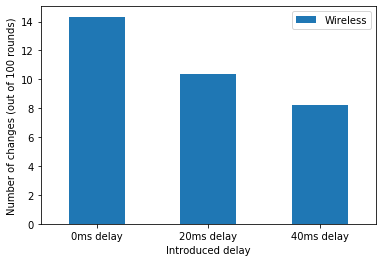

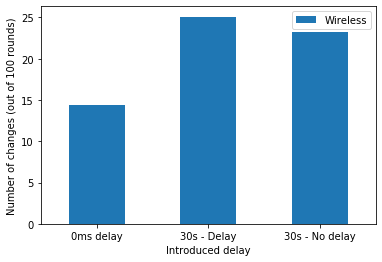

In [133]:
headers = ['time', 'gateway']


numbers5ms = read_gateway_change("cpuVariance/variance_5ms/gwChange")
numbers10ms = read_gateway_change("cpuVariance/variance_10ms/gwChange")
numbers40ms = read_gateway_change("cpuVariance/variance_40ms/gwChange")
numbers20ms = read_gateway_change("cpuVariance/variance_20ms/gwChange")
numbersNormal = read_gateway_change("cpuVariance/normal/gwChange")

print(numbersNormal, numbers20ms, numbers40ms)
df = pd.DataFrame({'Wireless':{
                  '0ms delay':numbersNormal, 
                  #'5ms delay':numbers5ms, 
                  #'10ms delay':numbers10ms,
                  '20ms delay':numbers20ms, 
                  '40ms delay':numbers40ms}},)
#df.sort_values()
df.plot.bar(rot=360)
plt.ylabel("Number of changes (out of 100 rounds)")
plt.xlabel('Introduced delay')
plt.show()


numbers30s = read_gateway_change("freq_variance/freq_download_nodelay/gwChange")
numbers30sDelay = read_gateway_change("freq_variance/freq_download_delay/gwChange")

df = pd.DataFrame({'Wireless':{
                  '0ms delay':numbersNormal, 
                  #'5ms delay':numbers5ms, 
                  #'10ms delay':numbers10ms,
                  '30s - No delay':numbers30s, 
                  '30s - Delay':numbers30sDelay}},)
#df.sort_values()
df.plot.bar(rot=360)
plt.ylabel("Number of changes (out of 100 rounds)")
plt.xlabel('Introduced delay')
plt.show()

/home/khulan/.local/lib/python3.6/site-packages/ipykernel_launcher.py:19: FutureWarning: pd.TimeGrouper is deprecated and will be removed; Please use pd.Grouper(freq=...)
/home/khulan/.local/lib/python3.6/site-packages/ipykernel_launcher.py:19: FutureWarning: pd.TimeGrouper is deprecated and will be removed; Please use pd.Grouper(freq=...)
/home/khulan/.local/lib/python3.6/site-packages/ipykernel_launcher.py:19: FutureWarning: pd.TimeGrouper is deprecated and will be removed; Please use pd.Grouper(freq=...)


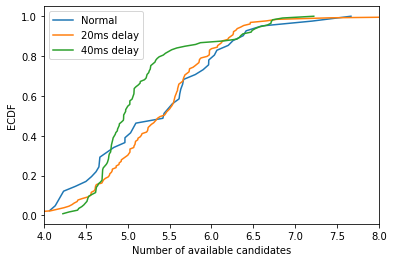

In [48]:
headers = ['time', 'candidates']

INPUT_DIR = os.path.join("cpuVariance/normal/candidates")
dirs = [f for f in os.listdir(INPUT_DIR) if os.path.isdir(os.path.join(INPUT_DIR))]
cand_normal =  read_gateway_candidates(os.path.join(INPUT_DIR))
ax = getECDF(dense, 'candidates').plot()

INPUT_DIR = os.path.join("cpuVariance/variance_20ms/candidates")
dirs = [f for f in os.listdir(INPUT_DIR) if os.path.isdir(os.path.join(INPUT_DIR))]
cand_20ms =  read_gateway_candidates(os.path.join(INPUT_DIR))
getECDF(cand_20ms, 'candidates').plot(ax=ax)


INPUT_DIR = os.path.join("cpuVariance/variance_40ms/candidates")
dirs = [f for f in os.listdir(INPUT_DIR) if os.path.isdir(os.path.join(INPUT_DIR))]
cand_40ms =  read_gateway_candidates(os.path.join(INPUT_DIR))
getECDF(cand_40ms, 'candidates').plot(ax=ax)

plt.legend(['Normal','20ms delay','40ms delay'])
plt.ylabel('ECDF')
plt.xlabel('Number of available candidates')
plt.xlim(4,8)
plt.show()

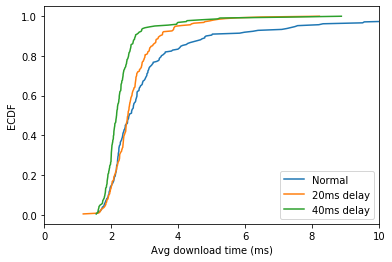

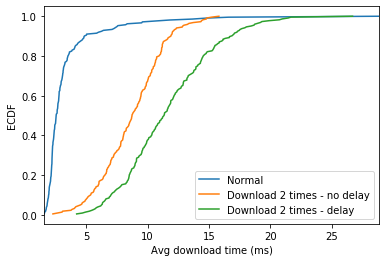

In [130]:
header = ['time','latency']

downloadNormal = read_gateway_users(os.path.join("cpuVariance/normal/download"))
download20ms = read_gateway_users(os.path.join("cpuVariance/variance_20ms/download"))
download40ms = read_gateway_users(os.path.join("cpuVariance/variance_40ms/download"))

#print(downloadNormal)
ax = getECDF(downloadNormal,'latency').plot()
getECDF(download20ms,'latency').plot(ax=ax)
getECDF(download40ms,'latency').plot(ax=ax)

plt.xlim(0,10)

plt.legend(['Normal','20ms delay','40ms delay'])
plt.ylabel('ECDF')
plt.xlabel('Avg download time (ms)')
plt.show()


header = ['time','latency']

downloadNormal = read_gateway_users(os.path.join("cpuVariance/normal/download"))
downloadFreq = read_gateway_users(os.path.join("freq_variance/freq_download_nodelay/download"))
downloadFreqDelay = read_gateway_users(os.path.join("freq_variance/freq_download_delay/download"))

#print(downloadNormal)
ax = getECDF(downloadNormal,'latency').plot()
getECDF(downloadFreq,'latency').plot(ax=ax)
getECDF(downloadFreqDelay,'latency').plot(ax=ax)

#plt.xlim(0,10)

plt.legend(['Normal','Download 2 times - no delay','Download 2 times - delay'])
plt.ylabel('ECDF')
plt.xlabel('Avg download time (ms)')
plt.show()

In [36]:
import warnings
warnings.filterwarnings('ignore')

headers = ['time', 'gateway']
def read_gwChange(dir_name):
    #Get list of nodes(files) with results
    INPUT_DIR = os.path.join(os.getcwd(), dir_name)
    data = pd.DataFrame()
    dirs = [f for f in os.listdir(INPUT_DIR) if os.path.isdir(os.path.join(INPUT_DIR))]    
    
    sum_change = 0
    for client in dirs:
        gw_data = pd.read_csv(os.path.join(INPUT_DIR, client), sep=',')
        gw_data.columns= headers
        gw_data = gw_data.set_index(pd.DatetimeIndex(gw_data['time']))
        gw_data = gw_data.head(100)
        gw_data['round'] = list(range(len(gw_data)))
        data = data.append(gw_data)
    
    returnData = pd.DataFrame()
    
    for name, group  in data.groupby([data['gateway']]):
        temp = pd.DataFrame()
        t = group['time'].groupby([group['round']]).count()
        temp['count'] = t
        temp['gateway'] = name
        returnData = returnData.append(temp)
    return returnData    
    

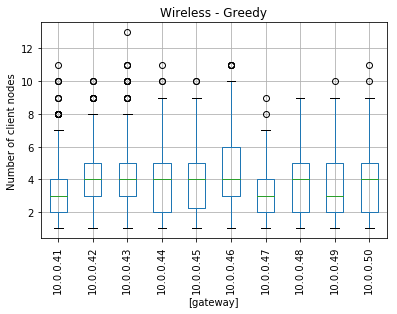

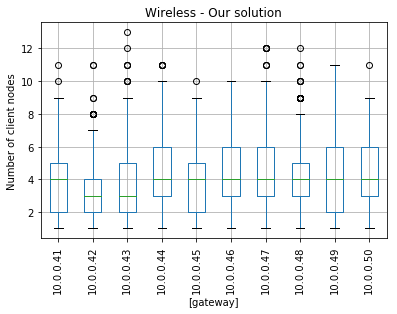

In [37]:
INPUT_DIR = os.path.join("brute/wireless/")
dirs = [f for f in os.listdir(INPUT_DIR) if os.path.isdir(os.path.join(INPUT_DIR))]
numbers = pd.DataFrame()
for path in dirs:
    temp = read_gwChange(os.path.join(INPUT_DIR, path+"/gwChange"))
    numbers= numbers.append(temp)
#numbers.hist(column='count', by='gateway',sharex=True)
#plt.show()

ax = None
legend = []
numbers.boxplot(by='gateway', rot=90)
plt.suptitle('')
plt.title('Wireless - Greedy')
plt.ylabel('Number of client nodes')
plt.show()

INPUT_DIR = os.path.join("power2/wireless")
dirs = [f for f in os.listdir(INPUT_DIR) if os.path.isdir(os.path.join(INPUT_DIR))]
numbers = pd.DataFrame()
for path in dirs:
    temp = read_gwChange(os.path.join(INPUT_DIR, path+"/gwChange"))
    numbers= numbers.append(temp)
plt.show()

ax = None
legend = []
numbers.boxplot(by='gateway', rot=90)
plt.suptitle('')
plt.ylabel('Number of client nodes')
plt.title("Wireless - Our solution")
plt.show()



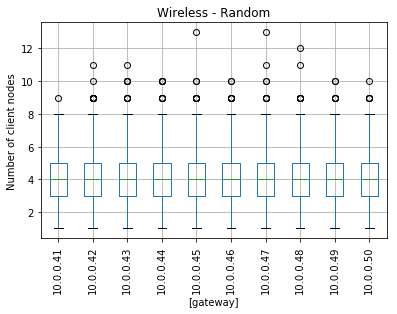

In [38]:
INPUT_DIR = os.path.join("complete_random/wireless/")
dirs = [f for f in os.listdir(INPUT_DIR) if os.path.isdir(os.path.join(INPUT_DIR))]
numbers = pd.DataFrame()
for path in dirs:
    temp = read_gwChange(os.path.join(INPUT_DIR, path+"/gwChange"))
    numbers= numbers.append(temp)
plt.show()

ax = None
legend = []
numbers.boxplot(by='gateway', rot=90)
plt.suptitle('')
plt.ylabel('Number of client nodes')
plt.title("Wireless - Random")
plt.show()


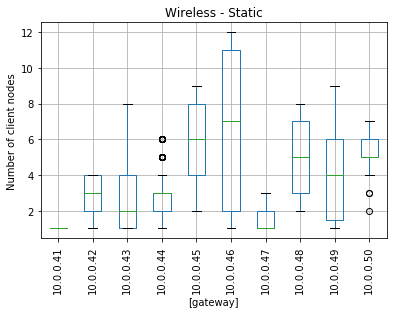

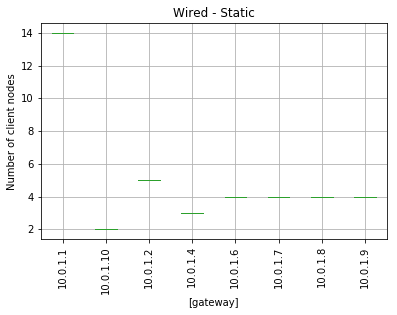

In [40]:
INPUT_DIR = os.path.join("select_once/wireless/")
dirs = [f for f in os.listdir(INPUT_DIR) if os.path.isdir(os.path.join(INPUT_DIR))]
numbers = pd.DataFrame()
for path in dirs:
    temp = read_gwChange(os.path.join(INPUT_DIR, path+"/gwChange"))
    numbers= numbers.append(temp)
plt.show()

ax = None
legend = []
numbers.boxplot(by='gateway', rot=90)
plt.suptitle('')
plt.ylabel('Number of client nodes')
plt.title("Wireless - Static")
plt.show()


INPUT_DIR = os.path.join("wired/static/")
dirs = [f for f in os.listdir(INPUT_DIR) if os.path.isdir(os.path.join(INPUT_DIR))]
numbers = pd.DataFrame()
for path in dirs:
    temp = read_gwChange(os.path.join(INPUT_DIR, path+"/gwChange"))
    numbers= numbers.append(temp)
plt.show()

ax = None
legend = []
numbers.boxplot(by='gateway', rot=90)
plt.suptitle('')
plt.ylabel('Number of client nodes')
plt.title("Wired - Static")
plt.show()


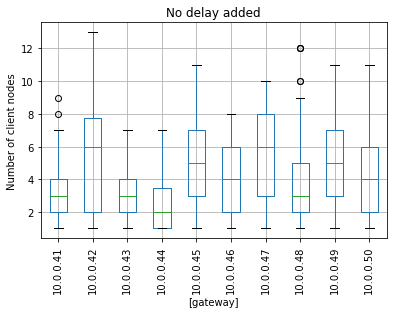

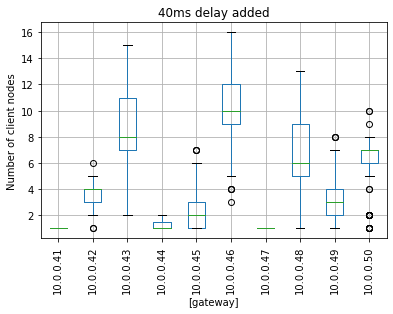

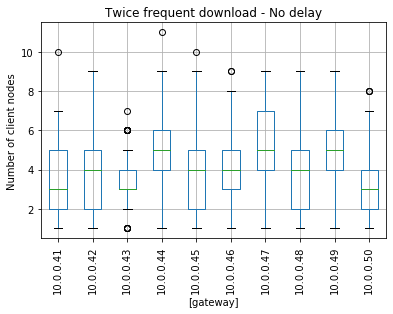

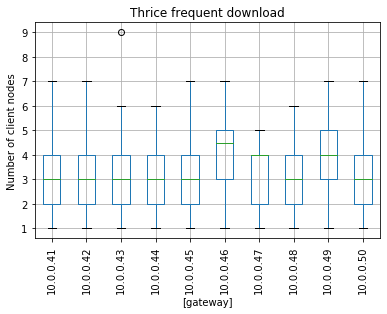

In [127]:
INPUT_DIR = os.path.join("cpuVariance/normal/")
dirs = [f for f in os.listdir(INPUT_DIR) if os.path.isdir(os.path.join(INPUT_DIR))]
numbers = pd.DataFrame()
temp = read_gwChange("cpuVariance/normal/gwChange")
numbers= numbers.append(temp)
numbers.boxplot(by='gateway', rot=90)
plt.suptitle('')
plt.title('No delay added')
plt.ylabel('Number of client nodes')
plt.show()


INPUT_DIR = os.path.join("cpuVariance/variance_40ms/")
dirs = [f for f in os.listdir(INPUT_DIR) if os.path.isdir(os.path.join(INPUT_DIR))]
numbers = pd.DataFrame()
temp = read_gwChange("cpuVariance/variance_40ms/gwChange")
numbers= numbers.append(temp)
numbers.boxplot(by='gateway', rot=90)
plt.suptitle('')
plt.title('40ms delay added')
plt.ylabel('Number of client nodes')
plt.show()



numbers = pd.DataFrame()
temp = read_gwChange("freq_variance/freq_download_nodelay/gwChange")
numbers= numbers.append(temp)
numbers.boxplot(by='gateway', rot=90)
plt.suptitle('')
plt.title('Twice frequent download - No delay')
plt.ylabel('Number of client nodes')
plt.show()



numbers = pd.DataFrame()
temp = read_gwChange("freq_variance/freq_20s/gwChange")
numbers= numbers.append(temp)
numbers.boxplot(by='gateway', rot=90)
plt.suptitle('')
plt.title('Thrice frequent download')
plt.ylabel('Number of client nodes')
plt.show()



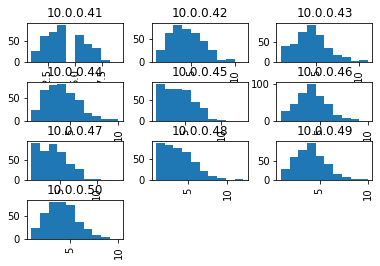

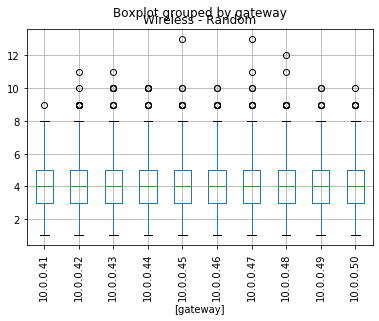

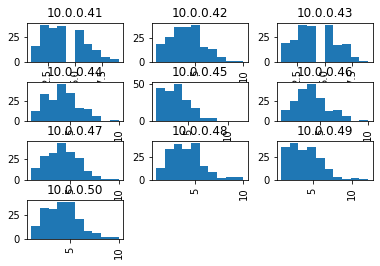

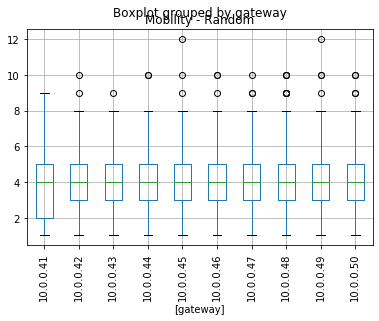

In [42]:



INPUT_DIR = os.path.join("complete_random/wireless/")
dirs = [f for f in os.listdir(INPUT_DIR) if os.path.isdir(os.path.join(INPUT_DIR))]
numbers = pd.DataFrame()
for path in dirs:
    temp = read_gwChange(os.path.join(INPUT_DIR, path+"/gwChange"))
    numbers= numbers.append(temp)
    
#print(numbers.groupby(['gateway']).describe())
numbers.hist(column='count', by='gateway')
plt.show()

ax = None
legend = []
numbers.boxplot(by='gateway', rot=90)
plt.title("Wireless - Random")
plt.show()


INPUT_DIR = os.path.join("complete_random/mobility/")
dirs = [f for f in os.listdir(INPUT_DIR) if os.path.isdir(os.path.join(INPUT_DIR))]
numbers = pd.DataFrame()
for path in dirs:
    temp = read_gwChange(os.path.join(INPUT_DIR, path+"/gwChange"))
    numbers= numbers.append(temp)


#print(numbers.groupby(['gateway']).describe())

numbers.hist(column='count', by='gateway')
plt.show()

ax = None
legend = []
numbers.boxplot(by='gateway', rot=90)
plt.title("Mobility - Random", loc='0.5, 1.2')
plt.show()